# Full analysis

Just to make sure that things make sense

In [1]:
import glob
import numpy as np
from scipy import fftpack
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_pdf import PdfPages


In [2]:
# import datetime

# Load data

In [3]:
folders = ['0_setup_protons',
'1_protons_1e11_both_ch',
'2_protons_1e11_ch1_high_BW',
'3_protons_1e11_both_untiltheend',
'4_electrons_600pC_ch1_high_BW',
'5_electrons_600pC_ch1_both_ch',
'6_electrons_steering_both_ch_reference',
'7_electrons_steering_both_ch_-5mm',
'8_electrons_steering_both_ch_0',
'9_electrons_steering_both_ch_+5mm',
'10_protons_2e11_2ch',
'11_protons_2e11_ch1_high_BW',
'12_protons+electrons_2ch_simultaneous',
'13_protons+electrons_ch1_simultaneous',
'14_protons+electrons_2ch_simultaneous_electron_bump+5mm',
'15_protons+electrons_2ch_simultaneous_electron_bump-5mm',
'16_protons+electrons_1ch_simultaneous_electron_bump-5mm',
'17_protons+electrons_1ch_simultaneous_electron_bump_in_centre',
'18_protons+electrons_1ch_simultaneous_electron_bump+5mm',
'19_electrons_ahead_3ns_zoom',
'20_electrons_ahead_2ch',
'21_electrons_ahead_3ns_ch1',
'22_electrons_behind_3ns_2ch',
'23_electrons_behind_3ns_ch1',
'24_until_the_last_proton_beam_alone_2ch']

paths = ['./data/'+f+'/*.txt' for f in folders]

files = [sorted(glob.glob(p)) for p in paths]

# Process and plot

In [151]:
def gimme(data_path, header_len=5):
    '''
    Produce the output of the single file analysis:
    
    data_path: the file including path
    
    data[0]: the timescale of the trace
    data[1]: the signal of the trace
    t_sampl: the sampling time
    freqs: the FFT frequency scale (the x axis in practice)
    f_spectrum_complex: the FFT output. Complex numbers.
    f_spectrum_abs: the FFT output. Complex numbers.

    '''
    data = np.loadtxt(data_path, delimiter=' ', skiprows=header_len)
    data = data.transpose()
    t_sampl = np.abs(data[0][0]-data[0][1])
    
    f_spectrum_complex = fftpack.fft(data[1])
    freqs = fftpack.fftfreq(data[1].size, d=t_sampl )
    
    f_spectrum_abs = np.abs(f_spectrum_complex)
    
    return data[0], data[1], t_sampl, freqs, f_spectrum_complex, f_spectrum_abs

def plotme(tt, yy, t_sampl, f_xx, f_yy, message):
    fig, ax = plt.subplots(2,1, figsize=(10,8), dpi=90)
    ax[0].plot(1e9*tt, yy)
    ax[0].set_xlabel('Time (ns)')
    ax[0].set_ylabel('Intensity (arb.u.)')
    ax[0].set_xticks(np.arange(1e9*np.min(tt), 1e9*np.max(tt), step=10), minor=True)
    ax[0].set_xticks(np.arange(1e9*np.min(tt), 1e9*np.max(tt), step=50), minor=False)    
    ax[0].set_yticks(np.arange(np.min(yy), np.max(yy), step=(np.max(yy)-np.min(yy))/5), minor=True)
    ax[0].set_yticks(np.arange(np.min(yy), np.max(yy), step=(np.max(yy)-np.min(yy))/10), minor=False)
    ax[0].grid()
    ax[0].grid(which='minor',alpha=0.4,linestyle='--')
    ax[0].set_title(message)

    ax[1].plot(1e-9*f_xx, f_yy)
    ax[1].set_xlabel('Frequency (GHz)')
    ax[1].set_ylabel('Absolute FFT (arb.u.)')
    ax[1].set_xlim(0, 20)
    ax[1].set_xticks(np.arange(0, 20, step=1), minor=True)
    ax[1].set_xticks(np.arange(0, 20, step=5), minor=False)
    ax[1].grid()
    ax[1].grid(which='minor',alpha=0.4,linestyle='--')
    ax[1].grid(axis='y',which='major',alpha=0.4,linestyle='--')



    return fig

def gimmeee(data_path, message):
    '''
    Same of gimme but also plot
    '''
    
    a,b,c,d,e,f = gimme(data_path)
    ff = plotme(a,b,c,d,f, message)
    
    return ff
    

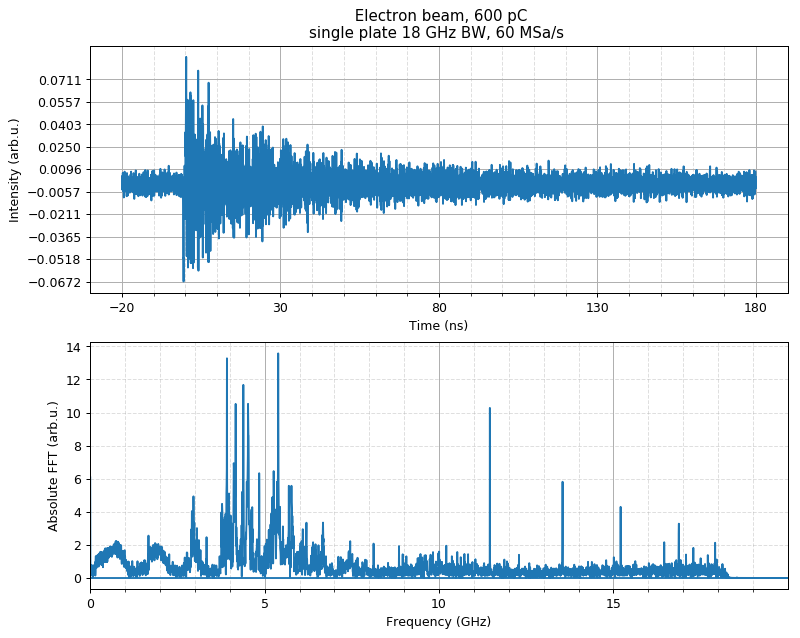

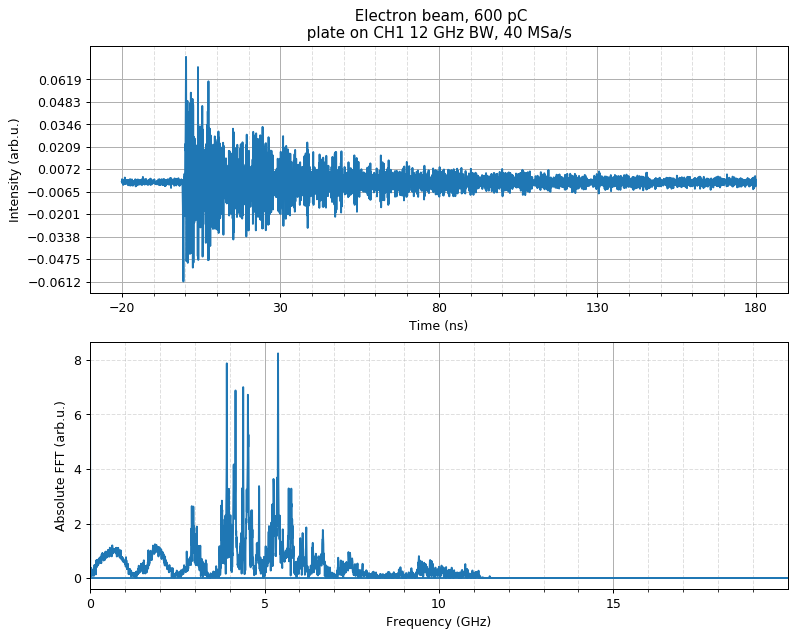

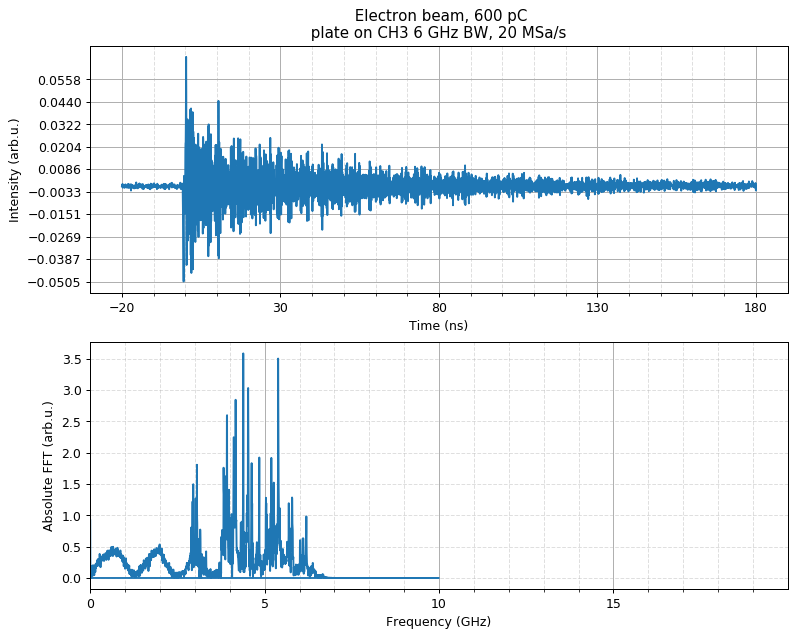

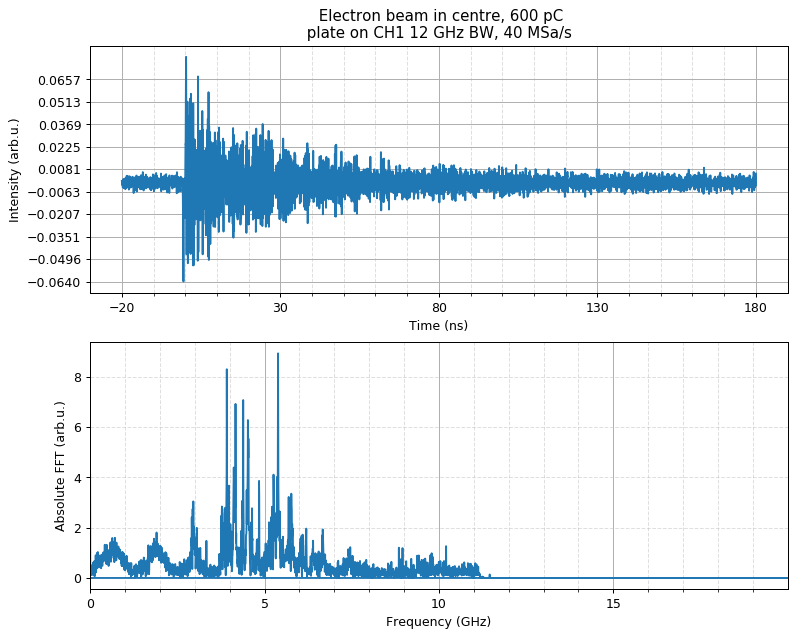

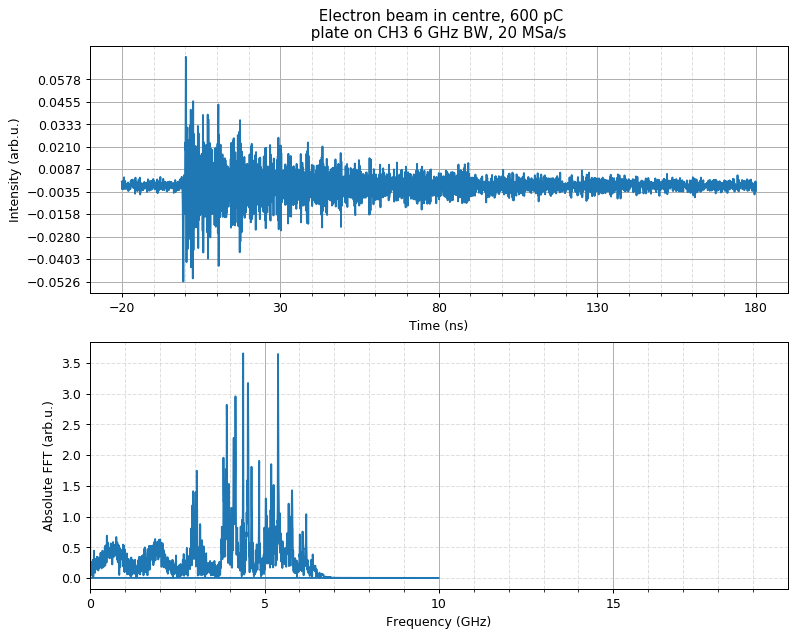

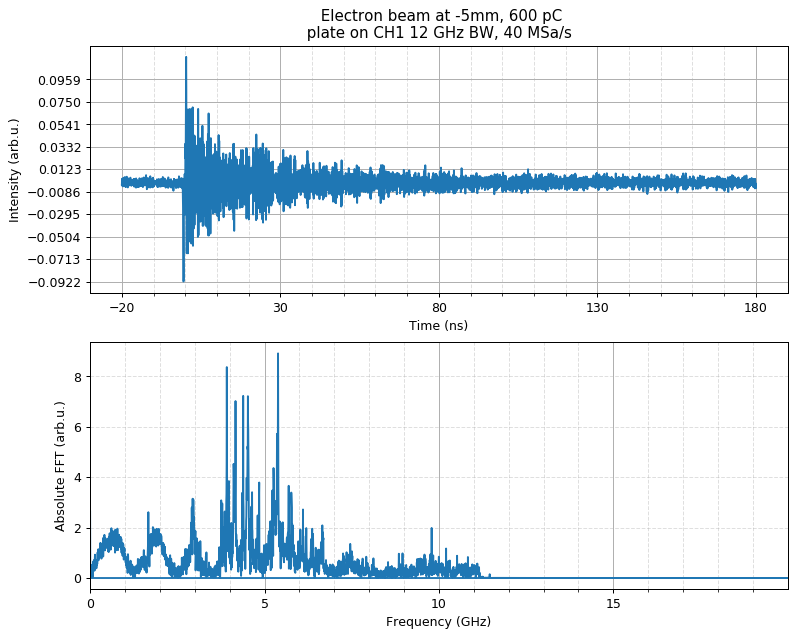

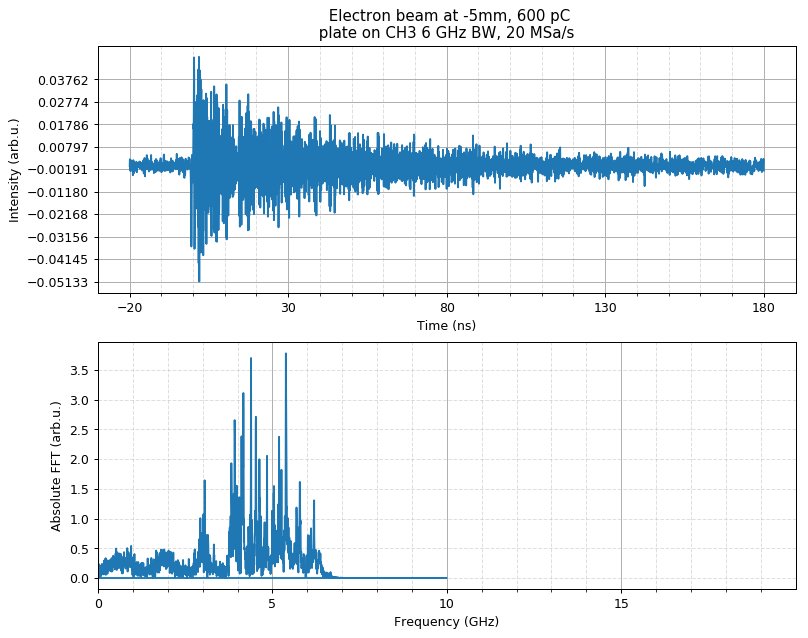

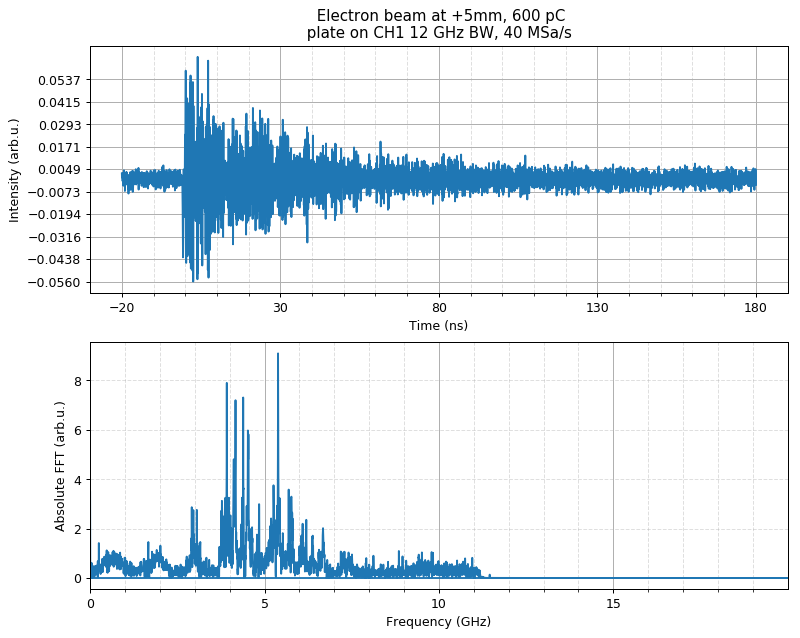

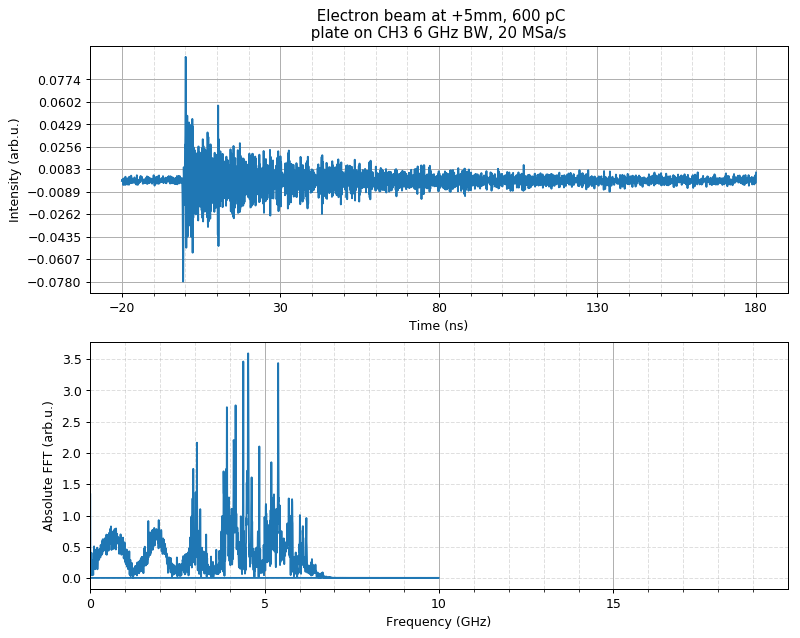

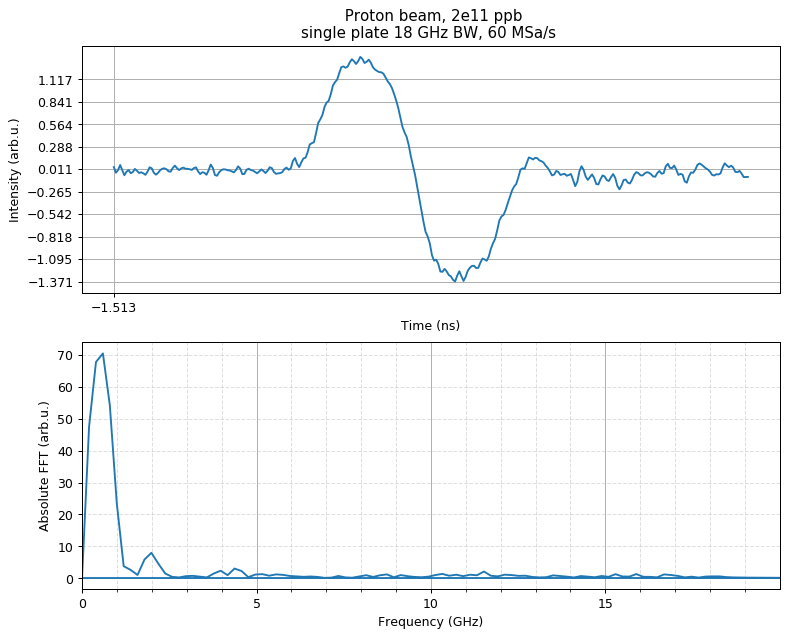

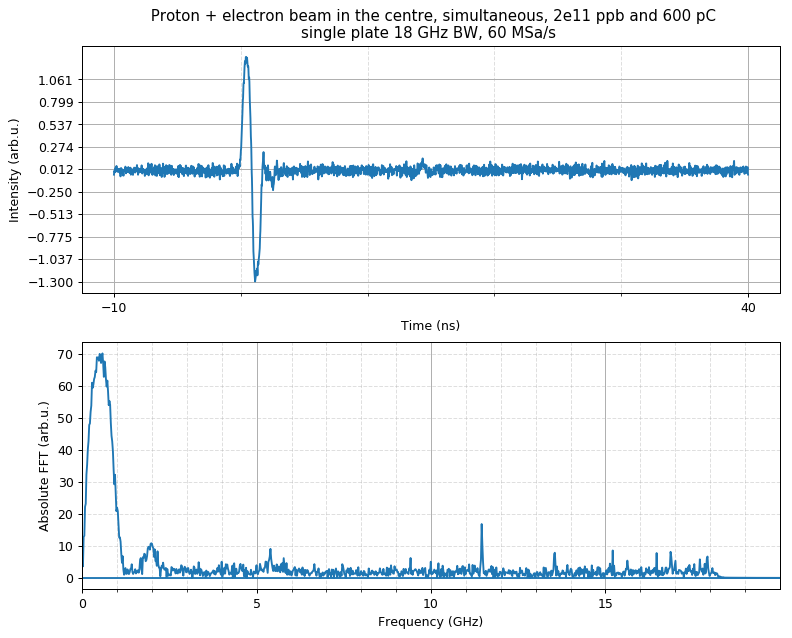

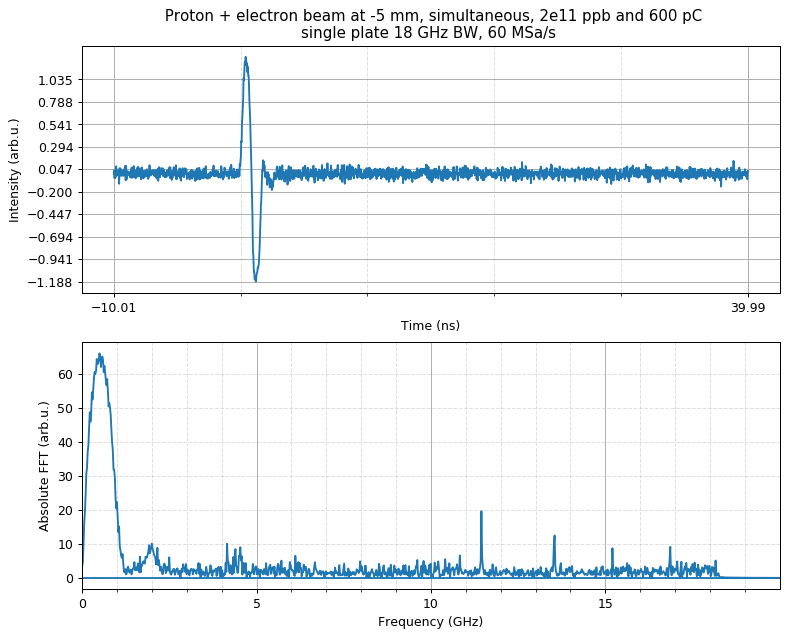

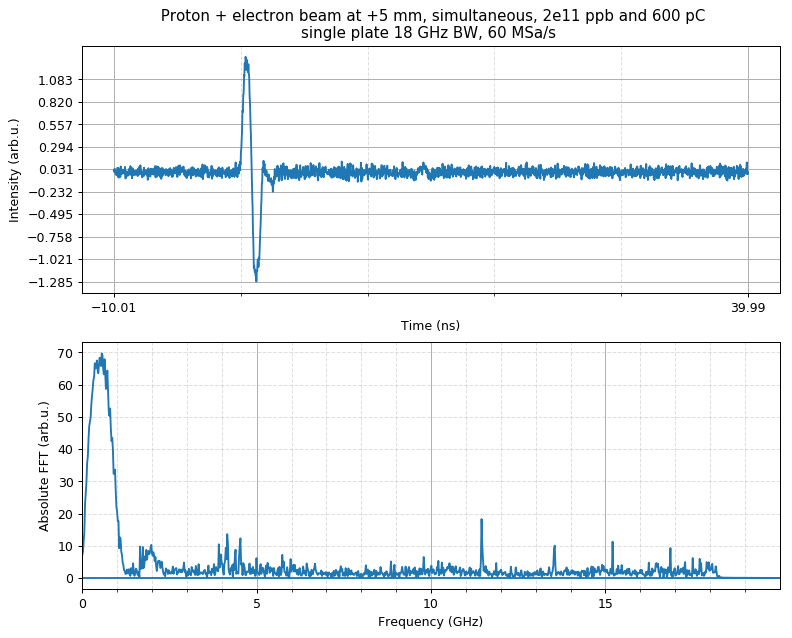

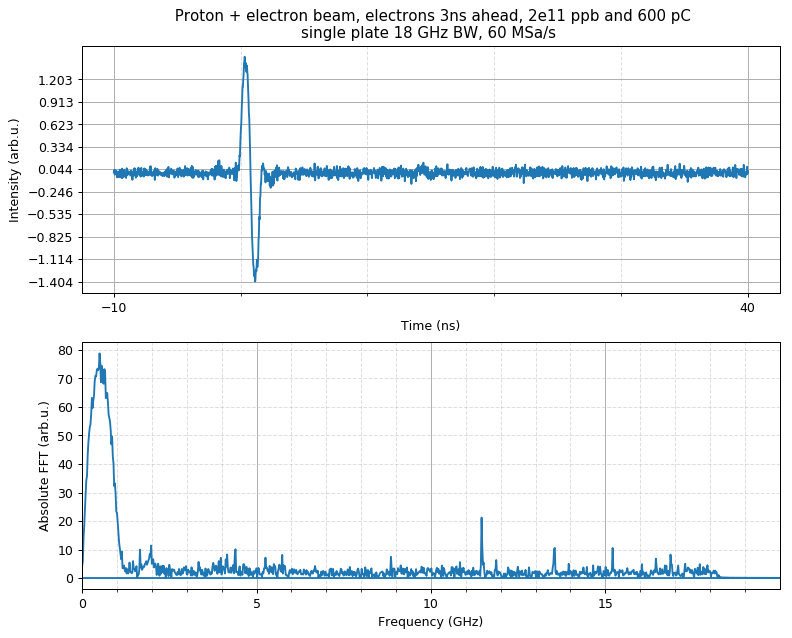

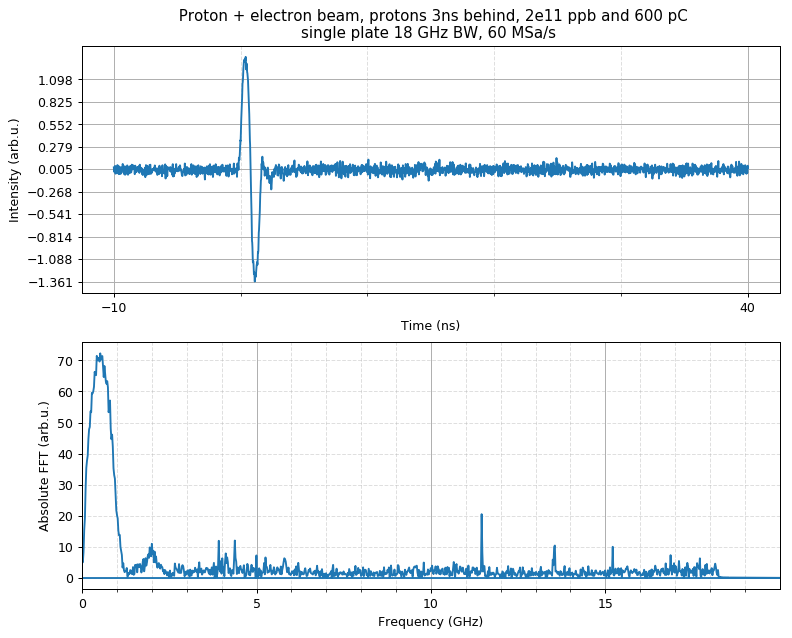

In [152]:
######################################## ELECTRONS ONLY
message = ''' Electron beam, 600 pC\nsingle plate 18 GHz BW, 60 MSa/s '''
f1 = gimmeee(files[4][5], message)
message = ''' Electron beam, 600 pC\n plate on CH1 12 GHz BW, 40 MSa/s '''
f2 = gimmeee(files[5][5], message)
message = ''' Electron beam, 600 pC\n plate on CH3 6 GHz BW, 20 MSa/s '''
f3 = gimmeee(files[5][107], message)

### BUMPS
# electrons in centre
message = ''' Electron beam in centre, 600 pC\n plate on CH1 12 GHz BW, 40 MSa/s '''
f4 = gimmeee(files[6][5], message)
message = ''' Electron beam in centre, 600 pC\n plate on CH3 6 GHz BW, 20 MSa/s '''
f5 = gimmeee(files[6][46], message)
# electrons at -5mm
message = ''' Electron beam at -5mm, 600 pC\n plate on CH1 12 GHz BW, 40 MSa/s '''
f6 = gimmeee(files[7][5], message)
message = ''' Electron beam at -5mm, 600 pC\n plate on CH3 6 GHz BW, 20 MSa/s '''
f7 = gimmeee(files[7][65], message)
# electrons at +5mm
message = ''' Electron beam at +5mm, 600 pC\n plate on CH1 12 GHz BW, 40 MSa/s '''
f8 = gimmeee(files[9][5], message)
message = ''' Electron beam at +5mm, 600 pC\n plate on CH3 6 GHz BW, 20 MSa/s '''
f9 = gimmeee(files[9][103], message)

######################################## PROTONS ONLY
message = ''' Proton beam, 2e11 ppb\nsingle plate 18 GHz BW, 60 MSa/s '''
f10 = gimmeee(files[11][5], message)

######################################## PROTONS + ELECTRONS SIMULTANEOUS
message = ''' Proton + electron beam in the centre, simultaneous, 2e11 ppb and 600 pC\nsingle plate 18 GHz BW, 60 MSa/s '''
f11 = gimmeee(files[13][5], message)
message = ''' Proton + electron beam at -5 mm, simultaneous, 2e11 ppb and 600 pC\nsingle plate 18 GHz BW, 60 MSa/s '''
f12 = gimmeee(files[16][5], message)
message = ''' Proton + electron beam at +5 mm, simultaneous, 2e11 ppb and 600 pC\nsingle plate 18 GHz BW, 60 MSa/s '''
f13 = gimmeee(files[18][5], message)

######################################## PROTONS + ELECTRONS DELAYED
message = ''' Proton + electron beam, electrons 3ns ahead, 2e11 ppb and 600 pC\nsingle plate 18 GHz BW, 60 MSa/s '''
f14 = gimmeee(files[21][5], message)
message = ''' Proton + electron beam, protons 3ns behind, 2e11 ppb and 600 pC\nsingle plate 18 GHz BW, 60 MSa/s '''
f15 = gimmeee(files[23][5], message)


# Close the PDF report

In [153]:
pdf_report = PdfPages('pdf_plots.pdf')

pdf_report.savefig(f1)
pdf_report.savefig(f2)
pdf_report.savefig(f3)
pdf_report.savefig(f4)
pdf_report.savefig(f5)
pdf_report.savefig(f6)
pdf_report.savefig(f7)
pdf_report.savefig(f8)
pdf_report.savefig(f9)
pdf_report.savefig(f10)
pdf_report.savefig(f11)
pdf_report.savefig(f12)
pdf_report.savefig(f13)
pdf_report.savefig(f14)
pdf_report.savefig(f15)

pdf_report.close()
